In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
import os
import pandas as pd
import numpy as np
df_train = pd.read_csv(os.path.join('Dataset', 'news', 'train.csv'))

In [ ]:
display(df_train.head())
print('No. of samples: ',np.shape(np.array(df_train))[0])

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


No. of samples:  20800


In [ ]:
"""
Null values in df_train
"""

# To count all those numbers into a single total sum
print("Null values in df_train: ", df_train.isnull().sum().sum())

Null values in df_train:  2554


In [ ]:
"""
Dropping Null values
"""
# Dropping all rows(hence axis = 0) which has any of the columns with NULL values(hence how='any').
df_train.dropna(axis = 0, how='any', inplace=True)

In [ ]:
print("Null values in df_train: ", df_train.isnull().sum().sum())

Null values in df_train:  0


In [ ]:
# resetting indices of the rows after all NULL rows were removed
df_train.reset_index(inplace=True)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [ ]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")


Default GPU Device:/device:GPU:0


#### The method we follow doesn't evolve removing stop words. This is because we're using Word2Vec where these words and their context can actually contribute to model accuracy. However, we will use stemming to reduce any p[erformance bottlenecks that might arise. 
#### Also we will be using both title and content by combining them in a certain format. This combination will be understood by LSTM and will be correctly identified as a seperator 

In [ ]:
import nltk

# For regular expression seperation
import re

# Package for Stemming
from nltk.stem.porter import PorterStemmer

# We won't be importing stopwords as we don't plan to remove them

In [ ]:
# Copying to vars
x_train = df_train.copy()
y_train = df_train['label']

In [ ]:
len(x_train), len(y_train)

(18285, 18285)

# Data Preprocessing

In [ ]:
ps = PorterStemmer()
corpus_title = []
corpus_text = []

for i in range(0, len(x_train)):

    # Replacing all characters other than the letters([^a-zA-Z]) with spaces in title and text of each iteration
    title = re.sub('[^a-zA-Z]', ' ', x_train['title'][i])
    text = re.sub('[^a-zA-Z]', ' ', x_train['text'][i])

    # Converting into lower case
    title = title.lower()
    text = text.lower()
    
    # To split the title into the individual words
    title = title.split()
    # To split the text into the individual words
    text = text.split()

    title = [ps.stem(word) for word in title]
    text = [ps.stem(word) for word in text]

    # To join all the individual words into a sentence by joining them with spaces
    title= ' '.join(title)
    text= ' '.join(text)

    corpus_title.append(title)
    corpus_text.append(text)

In [ ]:
print( corpus_title[0], '\n\n', corpus_text[0])

hous dem aid we didn t even see comey s letter until jason chaffetz tweet it 

 hous dem aid we didn t even see comey s letter until jason chaffetz tweet it by darrel lucu on octob subscrib jason chaffetz on the stump in american fork utah imag courtesi michael jolley avail under a creativ common by licens with apolog to keith olbermann there is no doubt who the worst person in the world is thi week fbi director jame comey but accord to a hous democrat aid it look like we also know who the second worst person is as well it turn out that when comey sent hi now infam letter announc that the fbi wa look into email that may be relat to hillari clinton s email server the rank democrat on the relev committe didn t hear about it from comey they found out via a tweet from one of the republican committe chairmen as we now know comey notifi the republican chairmen and democrat rank member of the hous intellig judiciari and oversight committe that hi agenc wa review email it had recent discov in 

In [ ]:
# Combiing the words and title into a single entity to use for training later
corpus = []

for i in range(0, len(corpus_title)):
    corpus.append(corpus_title[i]+ '          '+ corpus_text[i])

In [ ]:
len(corpus)

18285

In [ ]:
voc_size = 30000
# Large length as we've both title and text
max_len = 3000

In [ ]:
# Converting into one hot representation
one_hot_rep = [one_hot(lines, voc_size) for lines in corpus]

In [ ]:
one_hot_rep[0], len(one_hot_rep[0])     # 856 words in line 1

([20721,
  22583,
  6312,
  9302,
  4739,
  10374,
  17597,
  29877,
  7812,
  12090,
  15682,
  26202,
  688,
  5722,
  18262,
  17322,
  20721,
  22583,
  6312,
  9302,
  4739,
  10374,
  17597,
  29877,
  7812,
  12090,
  15682,
  26202,
  688,
  5722,
  18262,
  17322,
  18590,
  7021,
  2752,
  25145,
  18764,
  5519,
  688,
  5722,
  25145,
  19156,
  24329,
  7736,
  26461,
  6305,
  14911,
  20678,
  907,
  14798,
  12308,
  7285,
  21648,
  8056,
  28504,
  213,
  18590,
  2791,
  4926,
  17901,
  12750,
  8286,
  27598,
  22921,
  9169,
  23521,
  4970,
  18520,
  19156,
  25276,
  20153,
  7736,
  19156,
  13891,
  9169,
  11896,
  740,
  13738,
  18040,
  3868,
  7812,
  28902,
  22201,
  12750,
  8056,
  20721,
  3525,
  6312,
  17322,
  19707,
  10682,
  9302,
  3080,
  15183,
  18520,
  19156,
  12696,
  25276,
  20153,
  9169,
  24457,
  22093,
  17322,
  4962,
  22107,
  11278,
  20537,
  7812,
  23494,
  10990,
  27223,
  6441,
  15682,
  9402,
  11278,
  19156,
  137

In [ ]:
# Adding padding to later pass to embedding layers
embed_inp = pad_sequences(one_hot_rep, max_len, padding='pre')
embed_inp

array([[    0,     0,     0, ..., 18535, 25708,  2932],
       [    0,     0,     0, ..., 12664, 22711,  6083],
       [    0,     0,     0, ..., 11088, 26516, 17301],
       ...,
       [    0,     0,     0, ..., 19156, 11923, 15376],
       [    0,     0,     0, ..., 25145, 17322,  6086],
       [    0,     0,     0, ..., 13069, 11439, 21874]], dtype=int32)

In [ ]:
# Creating a Model
embedding_vec_dim = 100
model = Sequential()
model.add(Embedding(output_dim= embedding_vec_dim, input_length= max_len, input_dim=voc_size))
model.add(LSTM(1000))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 100)         3000000   
                                                                 
 lstm (LSTM)                 (None, 1000)              4404000   
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 7,405,001
Trainable params: 7,405,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Converting into numpy arrays
x_train = np.array(embed_inp, dtype='float32')
y_train = np.array(y_train, dtype='float32')

In [ ]:
x_train.shape, y_train.shape

((18285, 3000), (18285,))

In [ ]:
# Splitting into test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)

In [ ]:
info = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
200/200 [==============================] - 984s 5s/step - loss: 0.5866 - accuracy: 0.7004 - val_loss: 0.6125 - val_accuracy: 0.6484
Epoch 2/10
200/200 [==============================] - 1063s 5s/step - loss: 0.4423 - accuracy: 0.7845 - val_loss: 0.3598 - val_accuracy: 0.8451
Epoch 3/10
200/200 [==============================] - 1096s 5s/step - loss: 0.2066 - accuracy: 0.9152 - val_loss: 0.1826 - val_accuracy: 0.9285
Epoch 4/10
200/200 [==============================] - 1103s 6s/step - loss: 0.0862 - accuracy: 0.9683 - val_loss: 0.1517 - val_accuracy: 0.9470
Epoch 5/10
200/200 [==============================] - 1101s 6s/step - loss: 0.0503 - accuracy: 0.9827 - val_loss: 0.1698 - val_accuracy: 0.9406
Epoch 6/10
200/200 [==============================] - 1108s 6s/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.1454 - val_accuracy: 0.9577
Epoch 7/10
200/200 [==============================] - 1103s 6s/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1625 - val_accuracy: 

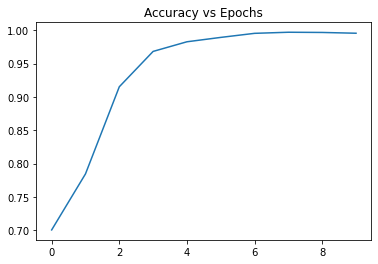

In [ ]:
from matplotlib import pyplot as plt
plt.title('Accuracy vs Epochs')
plt.plot(info.history['accuracy'])
plt.show()

In [ ]:
# Saving the model
model.save(os.path.join('Models', 'Model.h5'))